# PHYS 434 Lab 5: Explore LHC Data
In this project we are going to look at an inclusive search for the standard model Higgs boson in pp collisions at √ s = 13 TeV at the LHC using simulated data [A. Schuy]. The Higgs bosons are produced with large transverse momentum (pT) and decaying to a bottom quark-antiquark pair. The Higgs candidates could be reconstructed as large-radius jets using Calorimeters. Due to large QCD backgorund containmination, the direct 5-sigma observation of this Higgs channel is not accomplished yet[Phys. Rev. Lett. 120, 071802 (2018)]. We are going to use a set of training datasets to optimize event selections in order to enhance the discovery sensitivity. The optimal event selections will be applied to a selected pseudo-experiment data.

Both of you will use the same training samples for analysis. Each sample contains 14 features: ‘pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR' [Eur. Phys. J. C 79 (2019) 836]. You can explore different strategies for event selection optimization using training samples. The optimal event selection will be applied to pseudo-experiment data.
### Reading Data

In [48]:
# import library
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy
from scipy import stats
import h5py
import pickle
import seaborn as sns

## Lab 5a. Download the training datasets from one of the two pT-range folders. In each folder, there are 2 files, each containing 100k jets. The signal dataset is labeled as “higgs” and the background dataset is labeled as “qcd.”

In [2]:
# open the file of interest, and use pickle loading
file_qcd = open ("qcd_100000_pt_1000_1200.pkl",'rb')
file_higgs = open ("higgs_100000_pt_1000_1200.pkl",'rb')
dict_qcd = pickle.load(file_qcd)
dict_higgs = pickle.load(file_higgs)

# list all keys of the files
print(dict_qcd.keys())
print(dict_higgs.keys())

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')
Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')


In [59]:
# Print two variables, mass and d2, of the first 10 jets
for i in range(10):
 print(dict_qcd['pt'][i],dict_qcd['d2'][i])

1034.1815434674375 3.244342529835572
1125.535509379132 6.481473283811561
1099.2230872255052 2.6347878568119545
1118.230032359381 13.389844946183699
1059.907995708475 11.342156212232954
1155.1952238656659 2.525105538419591
1078.10643739412 3.0180758748270313
1159.8764861868178 7.180292494621935
1098.2780499188877 7.004058591448358
1011.2385314820914 1.2917788826098395


In [23]:
## extra data from the files
# background dataset QCD
pt_qcd = dict_qcd['pt']
eta_qcd = dict_qcd['eta']
phi_qcd = dict_qcd['phi']
mass_qcd = dict_qcd['mass']
ee2_qcd = dict_qcd['ee2']
ee3_qcd = dict_qcd['ee3']
d2_qcd = dict_qcd['d2']
angularity_qcd = dict_qcd['angularity']
t1_qcd = dict_qcd['t1']
t2_qcd = dict_qcd['t2']
t3_qcd = dict_qcd['t3']
t21_qcd = dict_qcd['t21']
t32_qcd = dict_qcd['t32']
KtDeltaR_qcd = dict_qcd['KtDeltaR']

# signal dataset higgs
pt_higgs = dict_higgs['pt']
eta_higgs = dict_higgs['eta']
phi_higgs = dict_higgs['phi']
mass_higgs = dict_higgs['mass']
ee2_higgs = dict_higgs['ee2']
ee3_higgs = dict_higgs['ee3']
d2_higgs = dict_higgs['d2']
angularity_higgs = dict_higgs['angularity']
t1_higgs = dict_higgs['t1']
t2_higgs = dict_higgs['t2']
t3_higgs = dict_higgs['t3']
t21_higgs = dict_higgs['t21']
t32_higgs = dict_higgs['t32']
KtDeltaR_higgs = dict_higgs['KtDeltaR']


In [24]:
print(mass_qcd.size)
print(mass_higgs.size)

100000
100000


## Lab 5b. Explore the training data by addressing following questions:
### 1. Do all features provide discrimination power between signal and background?

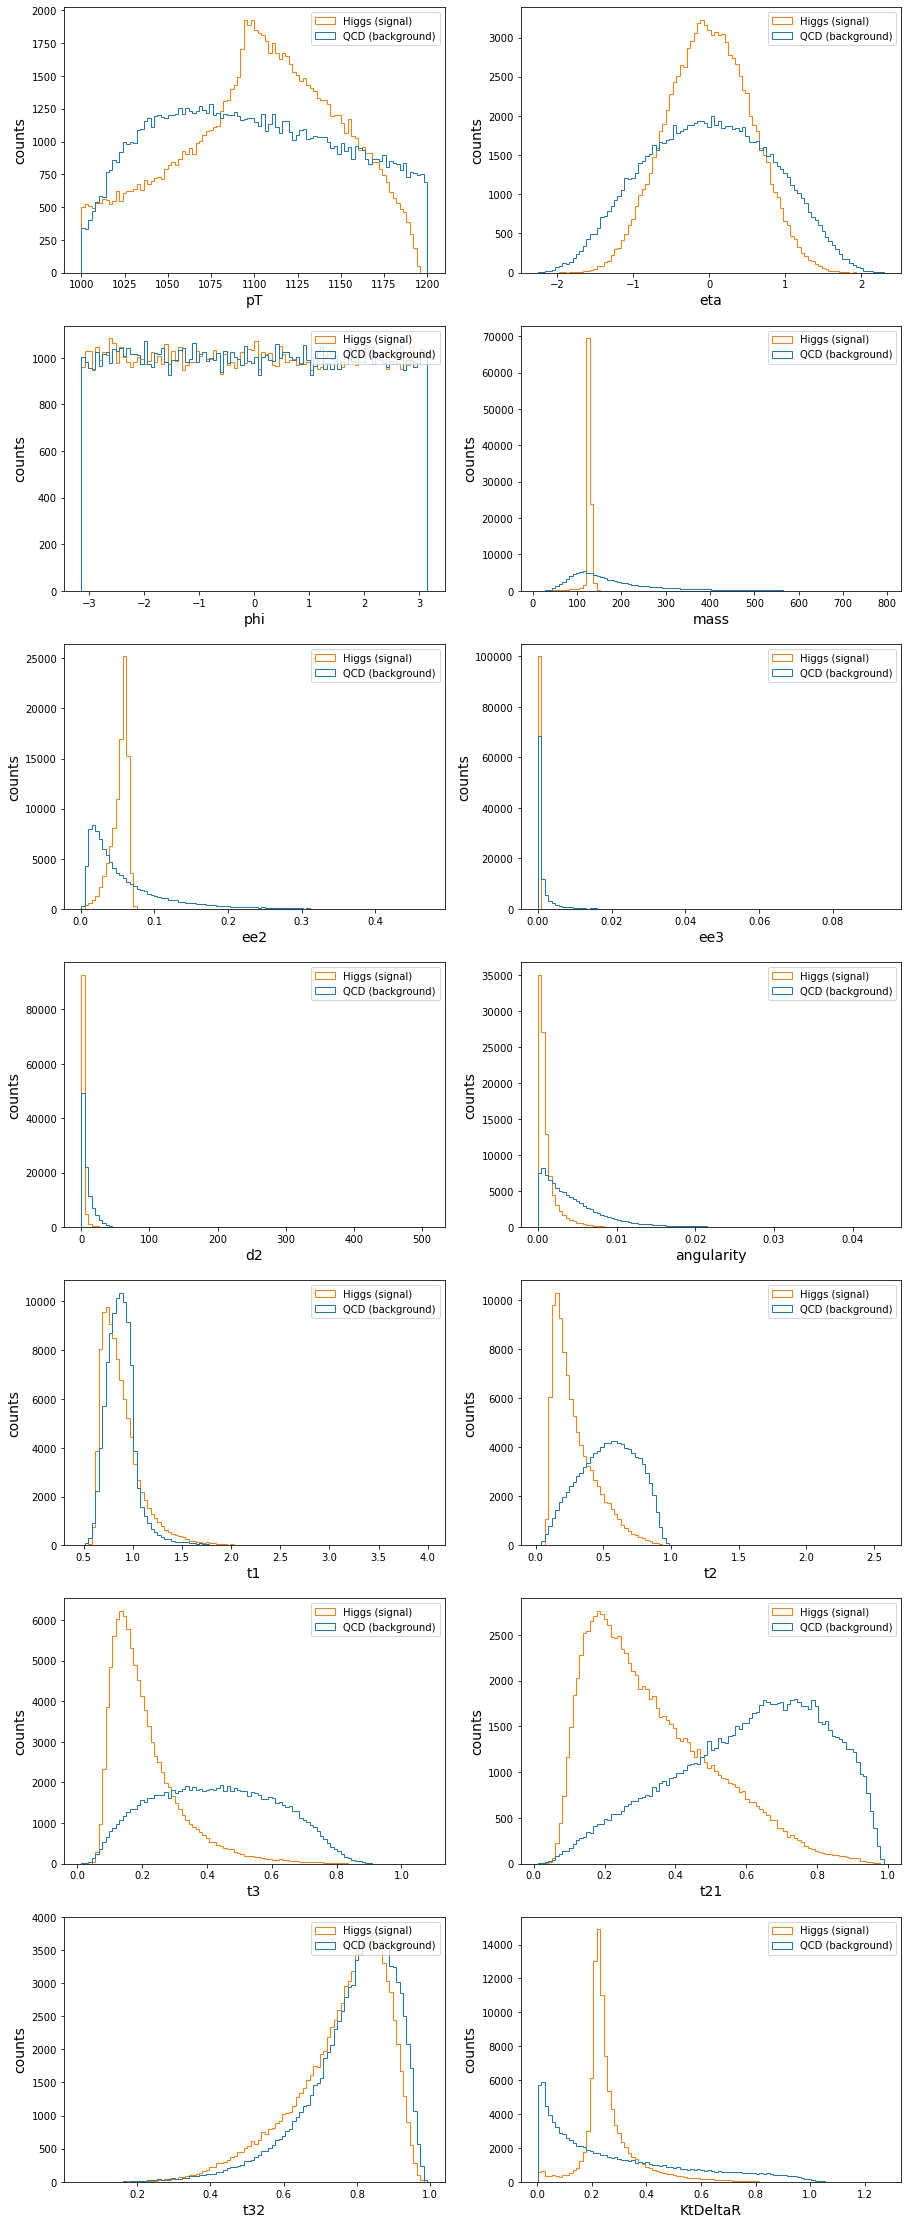

In [77]:
# create a figure with 14 subplots
fig, ax = plt.subplots(7, 2, figsize= (15, 40))

ax[0,0].hist([pt_qcd, pt_higgs], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[0,0].legend();
ax[0,0].set_xlabel("pT", fontsize = 14);
ax[0,0].set_ylabel("counts", fontsize = 14);

ax[0,1].hist([eta_qcd, eta_higgs], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[0,1].legend();
ax[0,1].set_xlabel("eta", fontsize = 14);
ax[0,1].set_ylabel("counts", fontsize = 14);

ax[1,0].hist([phi_qcd, phi_higgs], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[1,0].legend();
ax[1,0].set_xlabel("phi", fontsize = 14);
ax[1,0].set_ylabel("counts", fontsize = 14);

ax[1,1].hist([mass_qcd, mass_higgs], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[1,1].legend();
ax[1,1].set_xlabel("mass", fontsize = 14);
ax[1,1].set_ylabel("counts", fontsize = 14);

ax[2,0].hist([ee2_qcd, ee2_higgs], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[2,0].legend();
ax[2,0].set_xlabel("ee2", fontsize = 14);
ax[2,0].set_ylabel("counts", fontsize = 14);

ax[2,1].hist([ee3_qcd, ee3_higgs], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[2,1].legend();
ax[2,1].set_xlabel("ee3", fontsize = 14);
ax[2,1].set_ylabel("counts", fontsize = 14);

ax[3,0].hist([d2_qcd, d2_higgs], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[3,0].legend();
ax[3,0].set_xlabel("d2", fontsize = 14);
ax[3,0].set_ylabel("counts", fontsize = 14);

ax[3,1].hist([angularity_qcd, angularity_higgs], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[3,1].legend();
ax[3,1].set_xlabel("angularity", fontsize = 14);
ax[3,1].set_ylabel("counts", fontsize = 14);

ax[4,0].hist([t1_qcd, t1_higgs], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[4,0].legend();
ax[4,0].set_xlabel("t1", fontsize = 14);
ax[4,0].set_ylabel("counts", fontsize = 14);

ax[4,1].hist([t2_qcd, t2_higgs], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[4,1].legend();
ax[4,1].set_xlabel("t2", fontsize = 14);
ax[4,1].set_ylabel("counts", fontsize = 14);

ax[5,0].hist([t3_qcd, t3_higgs], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[5,0].legend();
ax[5,0].set_xlabel("t3", fontsize = 14);
ax[5,0].set_ylabel("counts", fontsize = 14);

ax[5,1].hist([t21_qcd, t21_higgs], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[5,1].legend();
ax[5,1].set_xlabel("t21", fontsize = 14);
ax[5,1].set_ylabel("counts", fontsize = 14);

ax[6,0].hist([t32_qcd, t32_higgs], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[6,0].legend();
ax[6,0].set_xlabel("t32", fontsize = 14);
ax[6,0].set_ylabel("counts", fontsize = 14);

ax[6,1].hist([KtDeltaR_qcd, KtDeltaR_higgs], bins = 100, histtype = "step", label = ["QCD (background)", "Higgs (signal)"]);
ax[6,1].legend();
ax[6,1].set_xlabel("KtDeltaR", fontsize = 14);
ax[6,1].set_ylabel("counts", fontsize = 14);

I have plotted all 14 features from both the qcd (background) data and the higgs (signal data) in the cell above with each subplot showing 1 feature. From the plots we can see that for most features, the signal and the background have different shapes or the curves differ significantly in height and they can be distinguished pretty easily. <br>
However, there are a few features that have very similar shapes and height in both the signal and the background data. For example, phi, t1, and t32.

### 2. Are there correlations among these features?

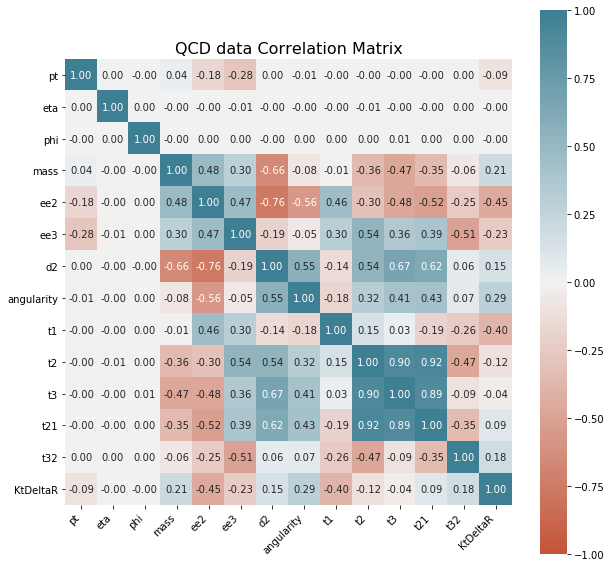

In [103]:
# plot Correlation Matrix for qcd data
corr = dict_higgs.corr()
ax= sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt='.2f'
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.set_title("QCD data Correlation Matrix", fontsize = 16);

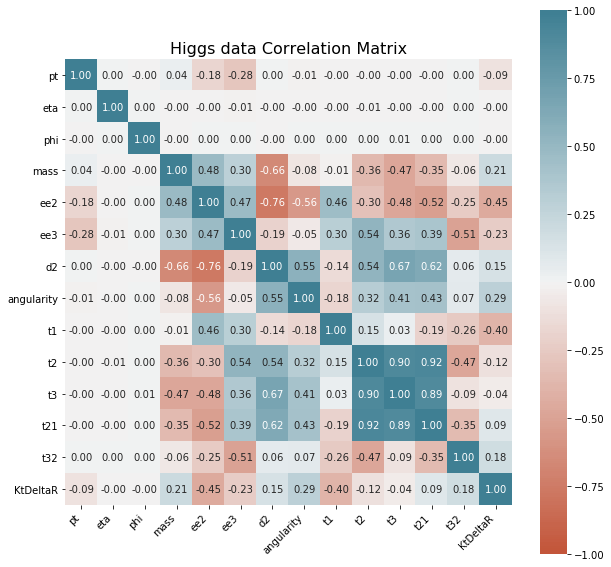

In [112]:
# plot Correlation Matrix for higgs data
corr = dict_higgs.corr()
ax= sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt='.2f'
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.set_title("Higgs data Correlation Matrix", fontsize = 16);

The two plots above are the correlation matrices between each of the two different features for our datasets. Blue represents positive correlation, red represents negative correlation. And the darker the color, the stronger the correlation is between two features. White boxes mean neutral correlation. 
From the two correlation matrices we can see the correlation between different features are the same for the QCD data and the Higgs data.

### 3. Compute expected discovery sensitivity by normalizing each sample appropriately.